In [622]:
import pandas as pd
df = pd.read_csv('dataset_model.csv')
df1 = pd.read_csv('dataset_model.csv')
primaryKeyDf = pd.DataFrame()
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [623]:
df.shape

(614, 13)

***Problem #1***
*Idenitfy & Remove the field that is providing only unique information about records .Capture it in another dataframe*

In [624]:
for i in df:
  if df[i].is_unique:
    primaryKeyDf[i] = df[i]
    df = df.drop(i,axis=1)
    df1 = df1.drop(i,axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


***Problem #2***
*Identifying Continous & Categorical Columns*

In [625]:
continuousColumns = [i for i in df if len(df[i].unique())>5] #Continuous columns was limited to unique values > 5
categoricalColumns = [i for i in df if len(df[i].unique())<=5] #Categorical columns was limited to unique values <5
print("List of continuous Columns\n{}\n\nList of Categorical Columns\n{}\n".format(continuousColumns,categoricalColumns))

List of continuous Columns
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

List of Categorical Columns
['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']



***Problem #3***
*Performing Uni-variate Analysis with Plots.Record your Observations*

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f17ed807208>,
      dtype=object)

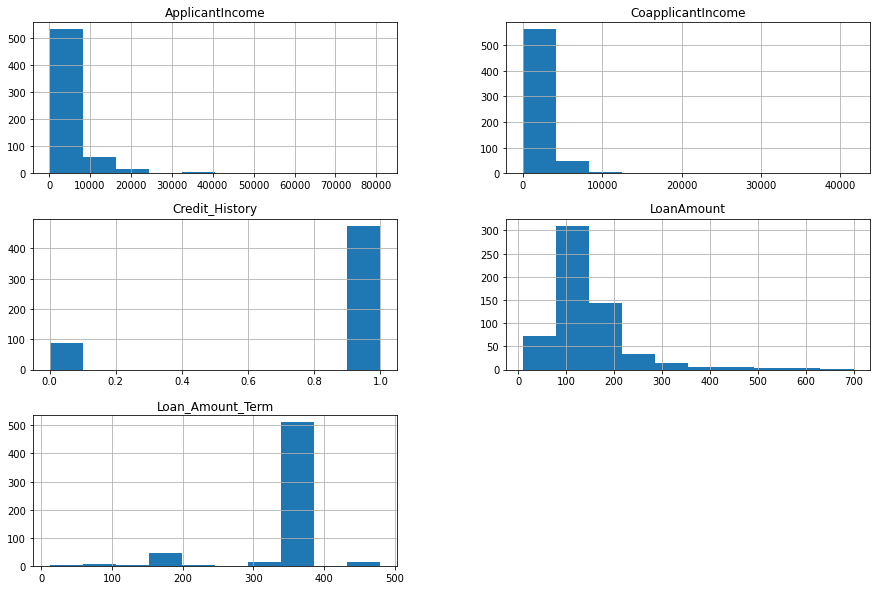

In [626]:
#Univariate Analysis of Numerical Data
df.hist(figsize=[15,10])

1)Maximum Applicants have applies for loan term of more then 360 days which is long term credibility for company

2)Maximum People are applying for loan amount which is less in average of every other combined so the company's amount in loan can be given to more people.

3) 10% of People are not having any credit history which is a risk for company to give loan to these people as several other insights maybe required before lending them loan

4)Majority of applicants are earning less then 15k which is also a risk for company while payback time.

5)There is 2% of people in income slab of 40000 which are more beneficial and trust worthy for loan paybacks 

Text(0.5, 0, 'Gender')

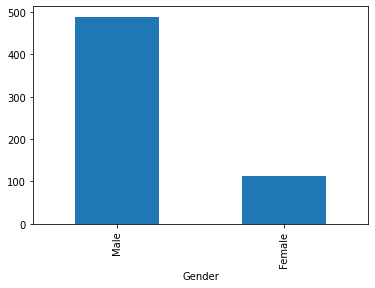

In [627]:
#Female Loan Applicants are 80% less than Male Applicants 
df['Gender'].value_counts().plot.bar().set_xlabel('Gender')

Text(0.5, 0, 'Marital Status')

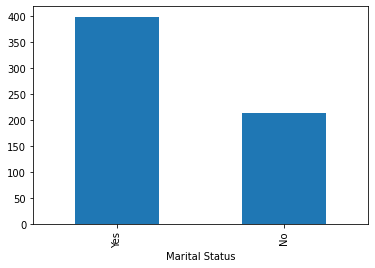

In [628]:
#Married Loan Applicants are considerable more than Not Married Applicants which is also a risk factor while payback
df['Married'].value_counts().plot.bar().set_xlabel('Marital Status')

Text(0.5, 0, 'Number of People Dependent On Applicant')

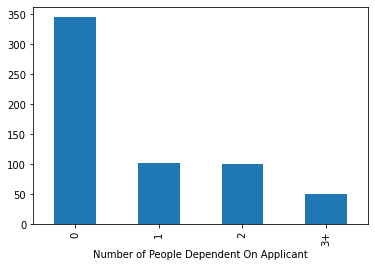

In [442]:
#Loan Applicants having people financially depended on them are risky to give loan to and here there are 80% of total applicants
#on whom no one is dependent
df['Dependents'].value_counts().plot.bar().set_xlabel("Number of People Dependent On Applicant")

Text(0.5, 0, 'Graudate/Non_Graduate')

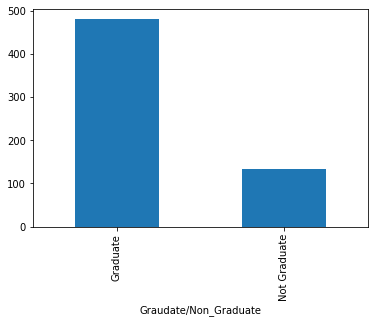

In [443]:
#Not graduates are also loan applicants which might be good if they are starting their business as 
#they can also be an asset while pay back period 
df['Education'].value_counts().plot.bar().set_xlabel('Graudate/Non_Graduate')

Text(0.5, 0, 'Employment Type')

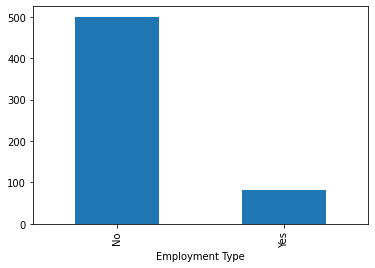

In [444]:
#Non-Self Employed are given more loan applicants which is actually good as they have a stable or fixed monthly income which
#in turn is easier for the applicant to payback interests or dues
df['Self_Employed'].value_counts().plot.bar().set_xlabel('Employment Type')

Text(0.5, 0, 'Kind Of Land owned by Applicant')

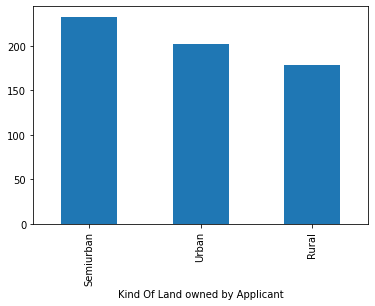

In [445]:
#Every loan Applicant is having some sort of land in their posession which is an asset for the applicant and also for the 
#debtor if dues are not made
df['Property_Area'].value_counts().plot.bar().set_xlabel('Kind Of Land owned by Applicant')


*#Loan_status uivariate analysis cannot provide any insights .....it needs to be bivariate*

***Problem 4***
*Perform Bi-variate Analysis among all Independent variables.Draw appropriate Plots , mention observations*

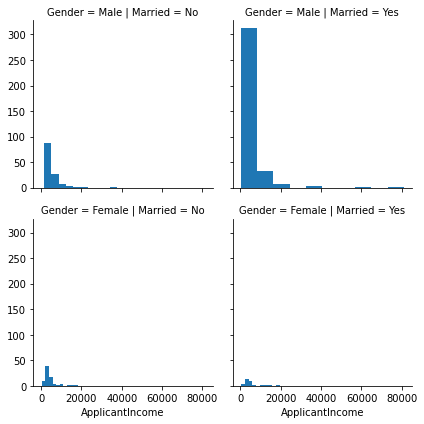

In [634]:
#Target varisable/Dependent Variable- Loan Status,Loan_amount_term,loan_amount
#IndependentVariables- Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoApplicantIncome,CreditHistory,PropertyArea
#DependentVariables- 
# UniqueInfo Loan_Id
import seaborn as sns
import matplotlib.pyplot as plt
fn = sns.FacetGrid(df,col='Married',row='Gender',height=3, aspect=1)
fn = fn.map(plt.hist,"ApplicantIncome")
fg.set_xlabels('Married')
fg.set_ylabels('ApplicantIncome')
##Observation
#Married Females are having less income whereas married males are having wayy more income

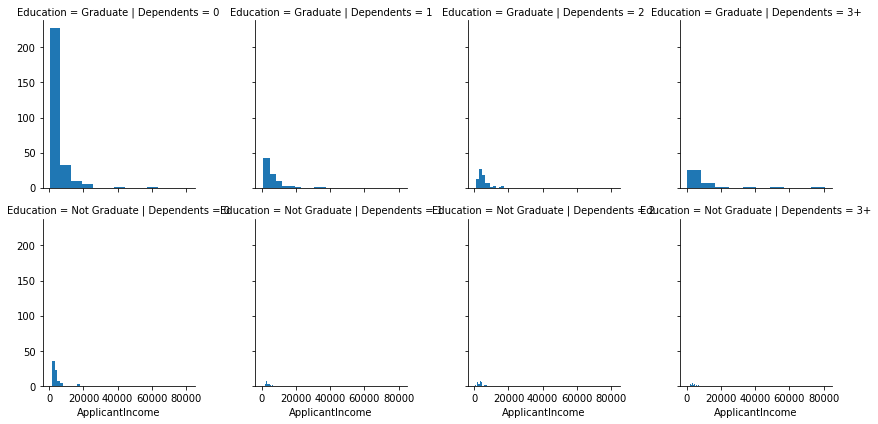

In [637]:
fn = sns.FacetGrid(df,col='Dependents',row='Education',height=3, aspect=1)
fn = fn.map(plt.hist,"ApplicantIncome")
fg.set_xlabels('Married')
fg.set_ylabels('ApplicantIncome')
##observation Non Graduates with dependency >0 are earning almost negligible which is a concerning issue if they have applied for loan

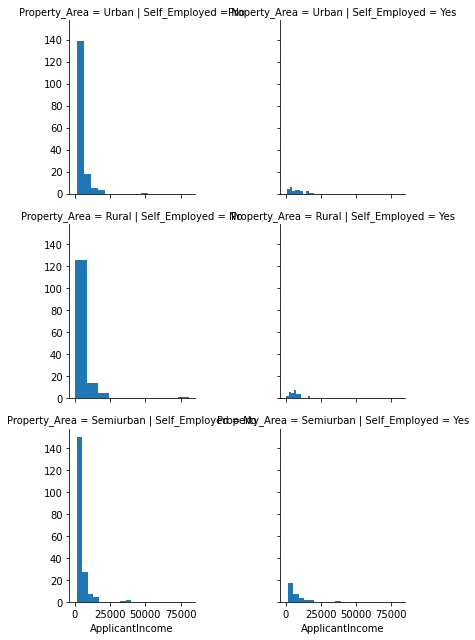

In [638]:
fn = sns.FacetGrid(df,col='Self_Employed',row='Property_Area',height=3, aspect=1)
fn = fn.map(plt.hist,"ApplicantIncome")
fg.set_xlabels('Married')
fg.set_ylabels('ApplicantIncome')
#observation -- self employed living in urban or rural or semi urban are also having negligible income

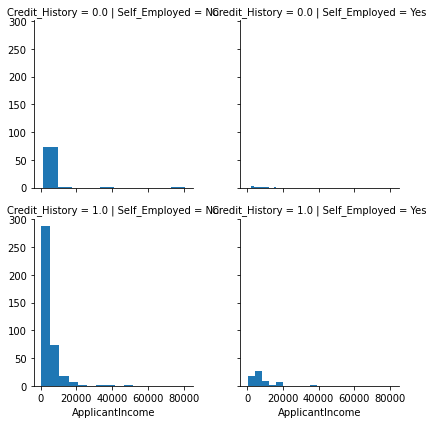

In [640]:
fn = sns.FacetGrid(df,col='Self_Employed',row='Credit_History',height=3, aspect=1)
fn = fn.map(plt.hist,"ApplicantIncome")
fg.set_xlabels('Married')
fg.set_ylabels('ApplicantIncome')
#observation ....credit history is not at all a feature for self employed here as they are negligible on both the values 1/0 

***Problem #5***
*Perform Bi-variate Analysis between Target Variable and each Independent variable. Use suitable plot , mention observations,trends etc*


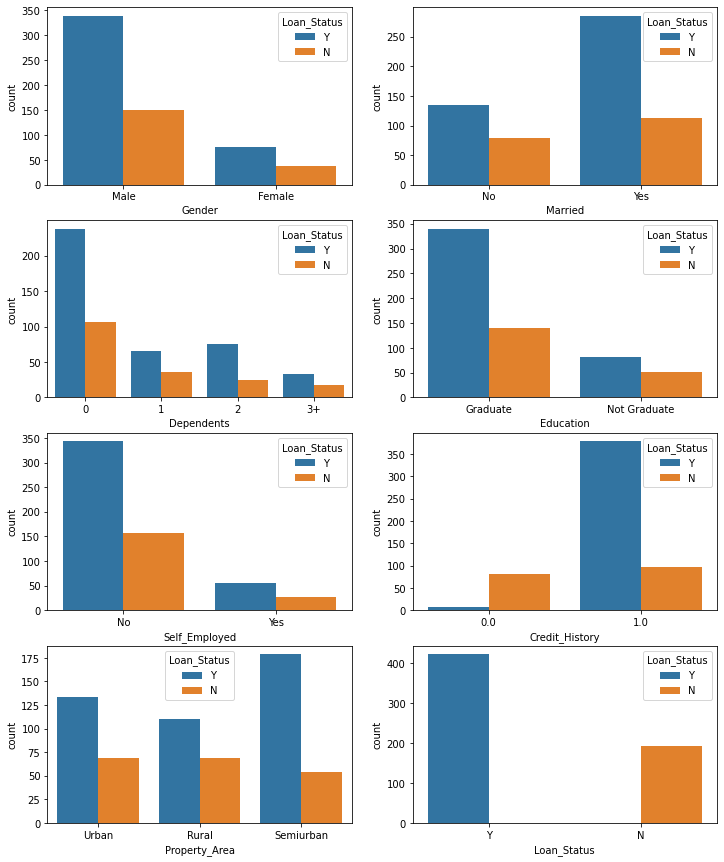

In [447]:
fig,axes = plt.subplots(4,2,figsize=(12,15))
for i,cat_col in enumerate(categoricalColumns):
    row,col = i//2,i%2
    sns.countplot(x=cat_col,data=df,hue='Loan_Status',ax=axes[row,col])



#['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','Credit_History','Property_Area']

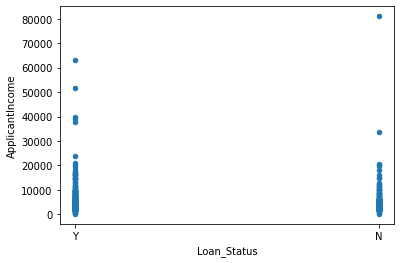

In [448]:
df.plot.scatter(x='Loan_Status',y='ApplicantIncome')

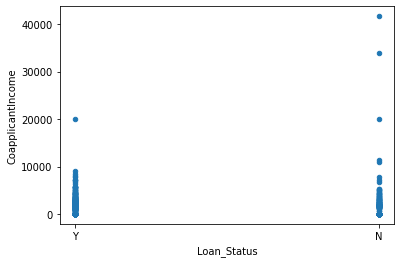

In [449]:
df.plot.scatter(x='Loan_Status',y='CoapplicantIncome')

***Problem 6***
*How is the class distribution (Y/N) in Label(Target) Variable ?*

In [450]:
df.groupby('Loan_Status').count()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_Status,,,,,,,,,,,
N,187,192,186,192,183,192,192,181,186,179,192
Y,414,419,413,422,399,422,422,411,414,385,422


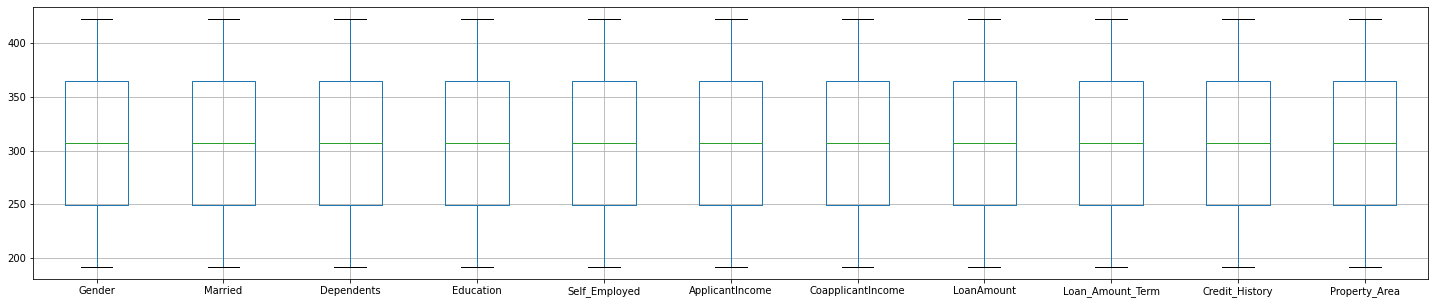

In [619]:
df.groupby('Loan_Status').count().boxplot(figsize=[25,5],fontsize=10)


***Problem #7 ***
*Identify the Independent Variables that have missing values*

In [452]:
import numpy as np
for col in df.columns:
  missingPercent = np.mean(df[col].isnull())
  if round(missingPercent*100) >0:
    missingValues = df[col].isnull().sum().sum()
    print("Column {} with mean {} with missing values  {}".format(col,int(round(missingPercent*100)),missingValues))
#As the below output the following columns in data have missing values with number of missin values written

Column Gender with mean 2 with missing values  13
Column Dependents with mean 2 with missing values  15
Column Self_Employed with mean 5 with missing values  32
Column LoanAmount with mean 4 with missing values  22
Column Loan_Amount_Term with mean 2 with missing values  14
Column Credit_History with mean 8 with missing values  50


***Problem #8***
*Handle missing values appropriately , explain the technique applied for each case*

In [0]:
#As the Gender column was string so we used to fill nan values with maximum occuring data
df['Gender']=df.Gender.fillna(df["Gender"].value_counts().nlargest(n=1).index[0])
df = df.fillna(0)

In [0]:
for col in df.columns:
  missingPercent = np.mean(df[col].isnull())
  if round(missingPercent*100) >0:
    missingValues = df[col].isnull().sum().sum()
    print("Column {} with mean {} with missing values  {}".format(col,int(round(missingPercent*100)),missingValues))
#After running this segment of code again there were no null or missing values found in dataframe

***Problem #9***
*Identify the Outliers in each Independent Variable.Distribute the data in each field using Quartile bins (0-25%,25%-50%,50%-75%,75%-100% iles)*

***Problem #10***
*Use Box-Plot chart to represent the Outliers for each Independent Variable*

In [455]:
IndependentVariables = ['Gender','Married','Dependents','Education','SelfEmployed','ApplicantIncome','CoApplicantIncome','CreditHistory','PropertyArea']
IndependentNumericalColumns = list(df._get_numeric_data().columns)
print(IndependentNumericalColumns)
##BoxPlot and describe() functions work for numeric data so extracted only numeric independed columns

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [457]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,141.166124,334.201954,0.773616
std,6109.041673,2926.248369,88.340630,82.183884,0.418832
min,150.000000,0.000000,0.000000,0.000000,0.000000
25%,2877.500000,0.000000,98.000000,360.000000,1.000000
50%,3812.500000,1188.500000,125.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64


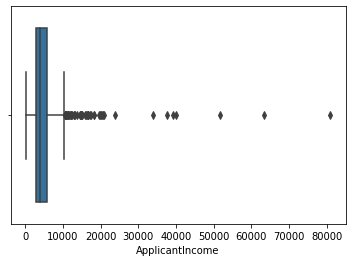

In [456]:
import seaborn as sns
sns.boxplot(x=df['ApplicantIncome'])
print(df['ApplicantIncome'].describe())
#8 Outliers are visible

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64


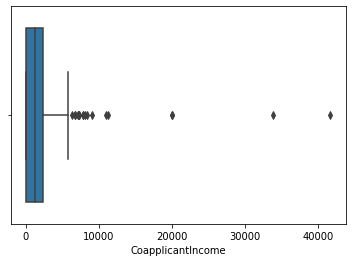

In [458]:
sns.boxplot(x=df['CoapplicantIncome'])
print(df['CoapplicantIncome'].describe())
#3/4 Outliers are visible

count    614.000000
mean     141.166124
std       88.340630
min        0.000000
25%       98.000000
50%      125.000000
75%      164.750000
max      700.000000
Name: LoanAmount, dtype: float64


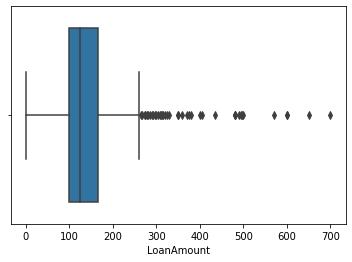

In [459]:
sns.boxplot(x=df['LoanAmount'])
print(df['LoanAmount'].describe())
#4 Outlier are visible

count    614.000000
mean     334.201954
std       82.183884
min        0.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64


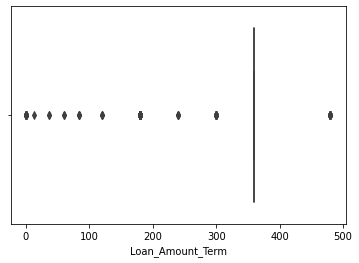

In [460]:
sns.boxplot(x=df['Loan_Amount_Term'])
print(df['Loan_Amount_Term'].describe())
#1 outlier

count    614.000000
mean       0.773616
std        0.418832
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Credit_History, dtype: float64


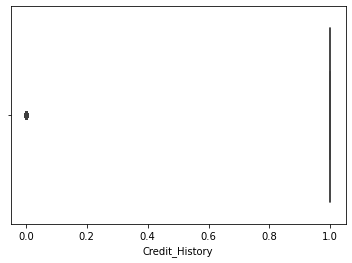

In [461]:
sns.boxplot(x=df['Credit_History'])
print(df['Credit_History'].describe())
#No outlier

***Problem #10***
*Perform treatment of these Outliers using appropriate techniqies.Explain your approach*

In [462]:
import numpy as np
print(df['ApplicantIncome'].quantile(0.1))
print(df['ApplicantIncome'].quantile(0.90))

2216.1000000000004
9459.900000000007


In [463]:
df.skew()
#Credit history data is perfectly symmetrical

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.362274
Loan_Amount_Term    -2.513134
Credit_History      -1.310835
dtype: float64

In [0]:
df["ApplicantIncome"] = np.where(df["ApplicantIncome"] <int(df['ApplicantIncome'].quantile(0.1)), int(df['ApplicantIncome'].quantile(0.1)),df['ApplicantIncome'])
df["ApplicantIncome"] = np.where(df["ApplicantIncome"] >int(df['ApplicantIncome'].quantile(0.9)), int(df['ApplicantIncome'].quantile(0.9)),df['ApplicantIncome'])

In [465]:
for i in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']:
  print(df[i].quantile(0.1))
  print(df[i].quantile(0.90))
  # print(df.skew())
  df[i] = np.where(df[i] <int(df[i].quantile(0.1)), int(df[i].quantile(0.1)),df[i])
  df[i] = np.where(df[i] >int(df[i].quantile(0.9)), int(df[i].quantile(0.9)),df[i])
  # print(df.skew())

2217.5
9428.400000000005
0.0
3782.200000000002
63.60000000000001
229.4000000000001
180.0
360.0


In [466]:
df.skew()
#Now the data is almost symmetrical as skewness is between -1 however loan_amount_term is still not symmetrical but though it is a time period and it is not too much skewed

ApplicantIncome      1.011996
CoapplicantIncome    0.518439
LoanAmount           0.490151
Loan_Amount_Term    -2.281106
Credit_History      -1.310835
dtype: float64

***STEP #1***
*Perform Label Encoding on Target Variable (Loan_Status)*

In [471]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,63.0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


***Step #2***
*Perform Label Encoding on Categorical Independent Variables*


In [549]:
dfEnc = df.copy()
dfEnc['Self_Employed'].replace({0:"No"},inplace=True)
dfEnc['Married'].replace({0:"No"},inplace=True)
dfEnc['Dependents'].replace({"3+":'3',0:'0'},inplace=True)
print(categoricalColumns)
for i in categoricalColumns:
  print(i)
  dfEnc[i+"_enc"] = le.fit_transform(dfEnc[i])
  dfEnc = dfEnc.drop(i,axis=1)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']
Gender
Married
Dependents
Education
Self_Employed
Credit_History
Property_Area


***What is the shape of dataframe post Categorical Encoding ***


In [550]:
dfEnc.shape

(614, 12)

In [551]:
dfEnc.head(10)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Gender_enc,Married_enc,Dependents_enc,Education_enc,Self_Employed_enc,Credit_History_enc,Property_Area_enc
0,5849,0.0,63.0,360.0,1,1,0,0,0,0,1,2
1,4583,1508.0,128.0,360.0,0,1,1,1,0,0,1,0
2,3000,0.0,66.0,360.0,1,1,1,0,0,1,1,2
3,2583,2358.0,120.0,360.0,1,1,1,0,1,0,1,2
4,6000,0.0,141.0,360.0,1,1,0,0,0,0,1,2
5,5417,3782.0,229.0,360.0,1,1,1,2,0,1,1,2
6,2333,1516.0,95.0,360.0,1,1,1,0,1,0,1,2
7,3036,2504.0,158.0,360.0,0,1,1,3,0,0,0,1
8,4006,1526.0,168.0,360.0,1,1,1,2,0,0,1,2
9,9428,3782.0,229.0,360.0,0,1,1,1,0,0,1,1


***Carry out Correlation analysis on this dataframe. Plot using HeatMap***

In [553]:
corr = dfEnc.corr()
corr.head(10)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Gender_enc,Married_enc,Dependents_enc,Education_enc,Self_Employed_enc,Credit_History_enc,Property_Area_enc
ApplicantIncome,1.000000,-0.270163,0.538537,-0.005042,-0.002873,0.065432,0.017897,0.118545,-0.206324,0.241964,0.059020,-0.034651
CoapplicantIncome,-0.270163,1.000000,0.235781,-0.027506,0.021879,0.201686,0.253135,-0.048895,-0.026584,-0.048360,-0.051313,-0.078070
LoanAmount,0.538537,0.235781,1.000000,0.082860,-0.019925,0.138615,0.175722,0.153934,-0.180854,0.109983,-0.014681,-0.090243
Loan_Amount_Term,-0.005042,-0.027506,0.082860,1.000000,0.024623,-0.066134,-0.082199,-0.065341,-0.120856,-0.020584,0.051225,-0.103673
Loan_Status,-0.002873,0.021879,-0.019925,0.024623,1.000000,0.017987,0.084281,0.010118,-0.085884,-0.003700,0.432616,0.032112
Gender_enc,0.065432,0.201686,0.138615,-0.066134,0.017987,1.000000,0.367389,0.172914,0.045364,-0.000525,0.026655,-0.025752
Married_enc,0.017897,0.253135,0.175722,-0.082199,0.084281,0.367389,1.000000,0.340684,0.017671,0.008491,-0.023626,0.000395
Dependents_enc,0.118545,-0.048895,0.153934,-0.065341,0.010118,0.172914,0.340684,1.000000,0.055752,0.056798,-0.017523,-0.000244
Education_enc,-0.206324,-0.026584,-0.180854,-0.120856,-0.085884,0.045364,0.017671,0.055752,1.000000,-0.010383,-0.081637,-0.065243
Self_Employed_enc,0.241964,-0.048360,0.109983,-0.020584,-0.003700,-0.000525,0.008491,0.056798,-0.010383,1.000000,-0.004994,-0.030860


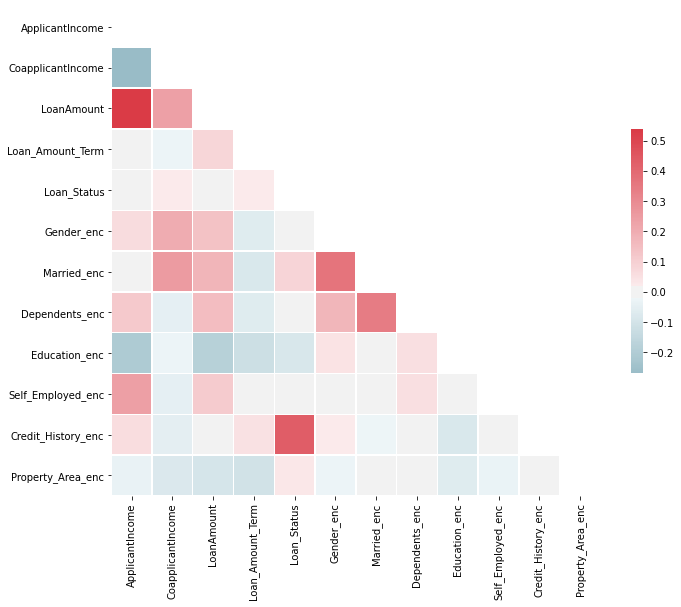

In [559]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
svm = sns.heatmap(corr, mask=mask, cmap=cmap, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
figure = svm.get_figure()

#

Identify the variables that have strong correlation using LHE ( Correlation Coefficient > 0.5 or <0.5)

***{"Loan_Amount":"ApplicantIncome","Credit_History":"Loan_Status"} are 2 major key,values having strongest co-relation}***

***Step #3***
*Perform One Hot Encoding on Categorical Independent Variables.*

In [578]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')
dfHotEnc = df.copy()
dfHotEnc['Self_Employed'].replace({0:"No"},inplace=True)
dfHotEnc['Married'].replace({0:"No"},inplace=True)
dfHotEnc['Dependents'].replace({"3+":'3',0:'0'},inplace=True)
print(categoricalColumns)
for i in categoricalColumns+['Loan_Status']:
  enc_rel = pd.DataFrame(ohe.fit_transform(dfHotEnc[[i]]).toarray())
  enc_rel = enc_rel.add_prefix(i+"_")
  dfHotEnc = dfHotEnc.join(enc_rel)
  dfHotEnc = dfHotEnc.drop(i,axis=1)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']


In [579]:
dfHotEnc.head(10)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_0,Gender_1,Married_0,Married_1,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Education_0,Education_1,Self_Employed_0,Self_Employed_1,Credit_History_0,Credit_History_1,Property_Area_0,Property_Area_1,Property_Area_2,Loan_Status_0,Loan_Status_1
0,5849,0.0,63.0,360.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,4583,1508.0,128.0,360.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,3000,0.0,66.0,360.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,2583,2358.0,120.0,360.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,6000,0.0,141.0,360.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
5,5417,3782.0,229.0,360.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
6,2333,1516.0,95.0,360.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
7,3036,2504.0,158.0,360.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
8,4006,1526.0,168.0,360.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
9,9428,3782.0,229.0,360.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


***What is the shape of dataframe post OHE Encoding ?***

In [580]:
dfHotEnc.shape

(614, 23)

***Carry out Correlation analysis on this dataframe. Plot using HeatMap***

In [584]:
hotCorr = dfHotEnc.corr()
hotCorr.head(10)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_0,Gender_1,Married_0,Married_1,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Education_0,Education_1,Self_Employed_0,Self_Employed_1,Credit_History_0,Credit_History_1,Property_Area_0,Property_Area_1,Property_Area_2,Loan_Status_0,Loan_Status_1
ApplicantIncome,1.000000,-0.270163,0.538537,-0.005042,-0.065432,0.065432,-0.017897,0.017897,-0.124726,0.080593,0.012676,0.096860,0.206324,-0.206324,-0.241964,0.241964,-0.059020,0.059020,0.042605,-0.023617,-0.016819,0.002873,-0.002873
CoapplicantIncome,-0.270163,1.000000,0.235781,-0.027506,-0.201686,0.201686,-0.253135,0.253135,0.040878,-0.020183,0.010664,-0.060054,0.026584,-0.026584,0.048360,-0.048360,0.051313,-0.051313,0.080751,-0.024666,-0.052633,-0.021879,0.021879
LoanAmount,0.538537,0.235781,1.000000,0.082860,-0.138615,0.138615,-0.175722,0.175722,-0.153544,0.060898,0.070774,0.096805,0.180854,-0.180854,-0.109983,0.109983,0.014681,-0.014681,0.065093,0.024402,-0.088165,0.019925,-0.019925
Loan_Amount_Term,-0.005042,-0.027506,0.082860,1.000000,0.066134,-0.066134,0.082199,-0.082199,0.066600,-0.057235,0.027300,-0.078334,0.120856,-0.120856,0.020584,-0.020584,-0.051225,0.051225,0.045827,0.082266,-0.129291,-0.024623,0.024623
Gender_0,-0.065432,-0.201686,-0.138615,0.066134,1.000000,-1.000000,0.367389,-0.367389,0.148421,0.004466,-0.129953,-0.096319,0.045364,-0.045364,-0.000525,0.000525,0.026655,-0.026655,-0.080283,0.108623,-0.034530,0.017987,-0.017987
Gender_1,0.065432,0.201686,0.138615,-0.066134,-1.000000,1.000000,-0.367389,0.367389,-0.148421,-0.004466,0.129953,0.096319,-0.045364,0.045364,0.000525,-0.000525,-0.026655,0.026655,0.080283,-0.108623,0.034530,-0.017987,0.017987
Married_0,-0.017897,-0.253135,-0.175722,0.082199,0.367389,-0.367389,1.000000,-1.000000,0.355644,-0.118052,-0.253280,-0.135217,0.017671,-0.017671,0.008491,-0.008491,-0.023626,0.023626,0.000220,0.000229,-0.000449,0.084281,-0.084281
Married_1,0.017897,0.253135,0.175722,-0.082199,-0.367389,0.367389,-1.000000,1.000000,-0.355644,0.118052,0.253280,0.135217,-0.017671,0.017671,-0.008491,0.008491,0.023626,-0.023626,-0.000220,-0.000229,0.000449,-0.084281,0.084281
Dependents_0,-0.124726,0.040878,-0.153544,0.066600,0.148421,-0.148421,0.355644,-0.355644,1.000000,-0.531373,-0.528246,-0.358315,0.036563,-0.036563,0.088254,-0.088254,-0.019743,0.019743,0.044015,-0.004173,-0.038264,0.003044,-0.003044
Dependents_1,0.080593,-0.020183,0.060898,-0.057235,0.004466,-0.004466,-0.118052,0.118052,-0.531373,1.000000,-0.198046,-0.134337,0.013355,-0.013355,-0.082044,0.082044,0.030415,-0.030415,-0.084117,0.011661,0.069320,0.038740,-0.038740


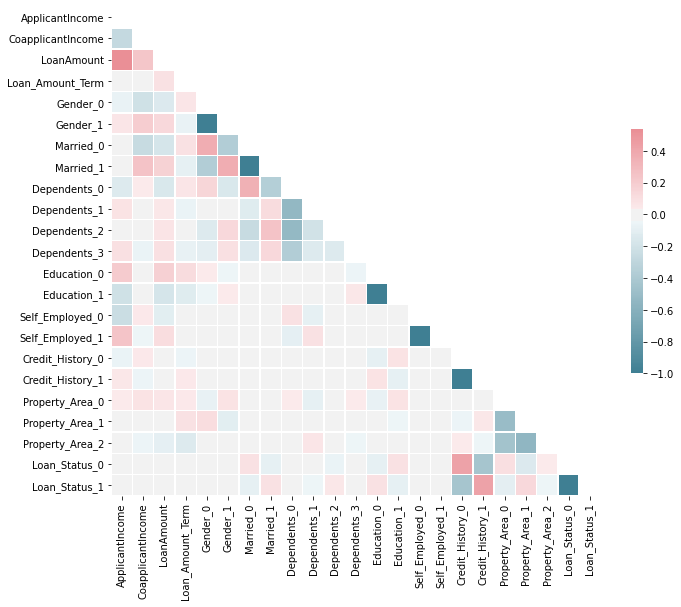

In [585]:
mask = np.zeros_like(hotCorr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
svm = sns.heatmap(hotCorr, mask=mask, cmap=cmap, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
figure = svm.get_figure()

***Identify the variables that have strong correlation using OHE ( Correlation Coefficient > 0.5 or <0.5)****

***Loan Amount Term : Applicant Income 
Loan Status(1/0) : Credit History(1/0) are the strongest positive co-relation*** 